In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [92]:
df.shape

(1470, 35)

In the dataset 1470 rows and 35 columns are present.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No null values are present and there are 2 types of data present(int64 and object64)

In [94]:
df.duplicated().sum()

0

No duplicate values are there in the dataset.

In [95]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [96]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

Standardhour and Employee count is a constant value and not contributing anything to the analysis and prediction so we will remove them.


In [97]:
df = df.drop(columns=['StandardHours', 'EmployeeCount','Over18'])

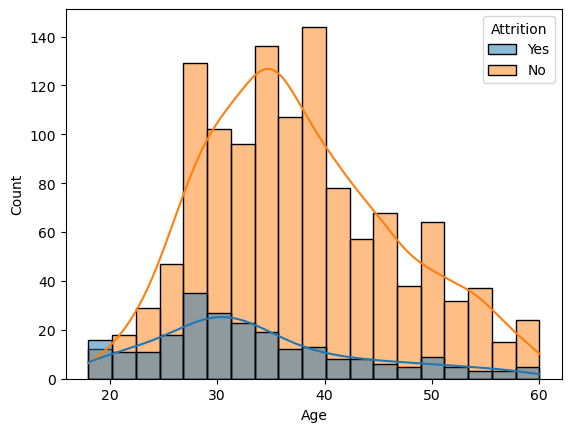

In [98]:
sns.histplot(x='Age', hue='Attrition', data=df, kde=True)
plt.show()

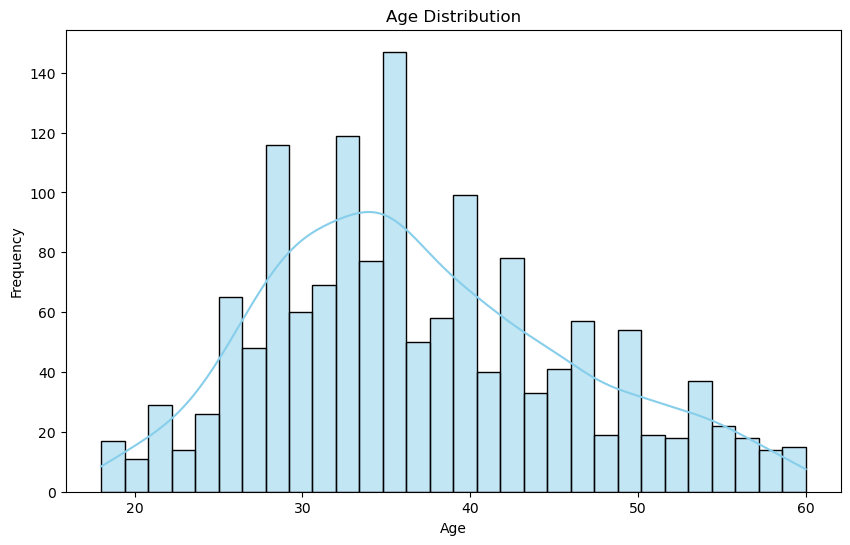

In [99]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Here in age distribution a noticeable increase in frequency around age 35.

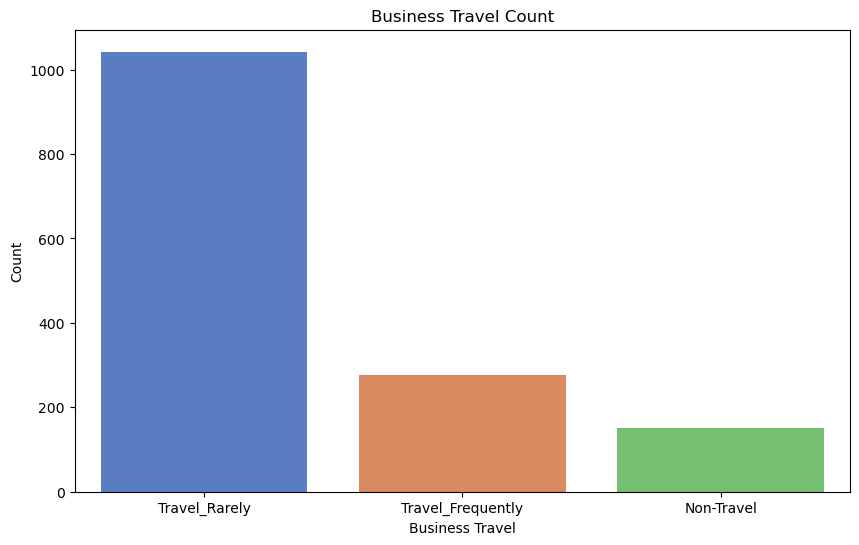

In [100]:
# Count plot for BusinessTravel
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', data=df, palette='muted')
plt.title('Business Travel Count')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

Travel_Rarely: The majority of employees falling into this category, indicating that a large proportion of employees within the dataset do not travel frequently for business purposes.

Non-Travel: The count for 'Non-Travel' being the minimum suggests that fewer employees within the dataset rarely or never travel for business.

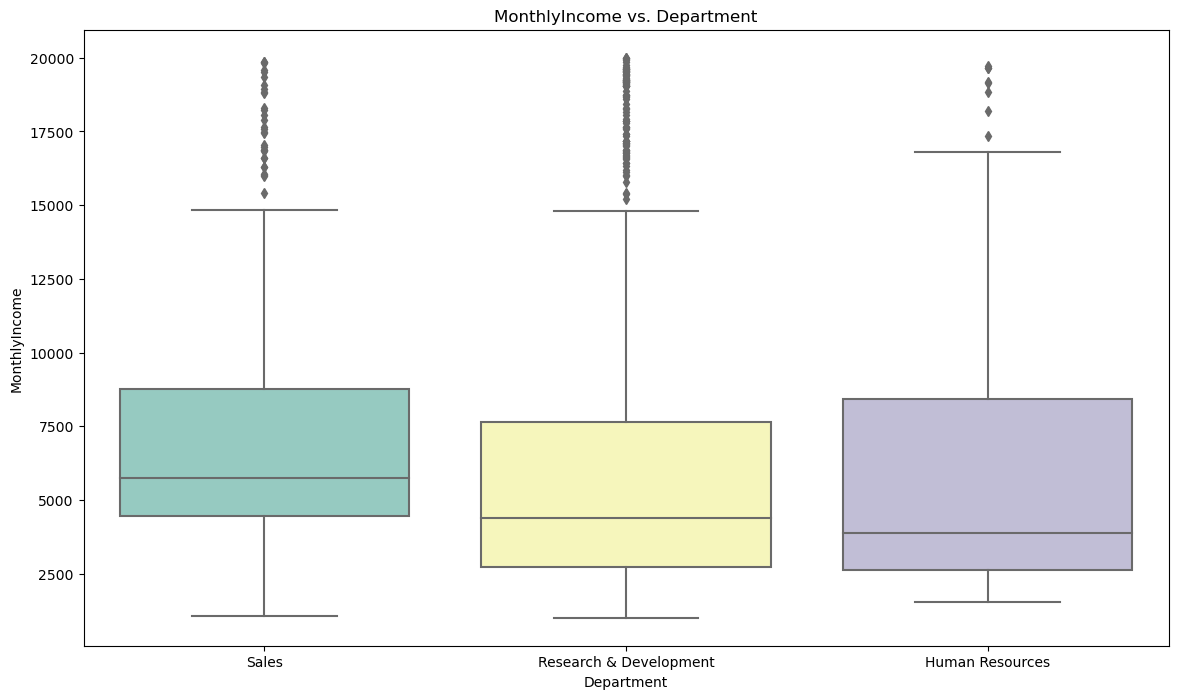

In [101]:
# Boxplot for MonthlyIncome vs. Department
plt.figure(figsize=(14, 8))
sns.boxplot(x='Department', y='MonthlyIncome', data=df, palette='Set3')
plt.title('MonthlyIncome vs. Department')
plt.xlabel('Department')
plt.ylabel('MonthlyIncome')
plt.show()

Monthly income range for all the departments is almost same, Human Resources department is a little on higher side.

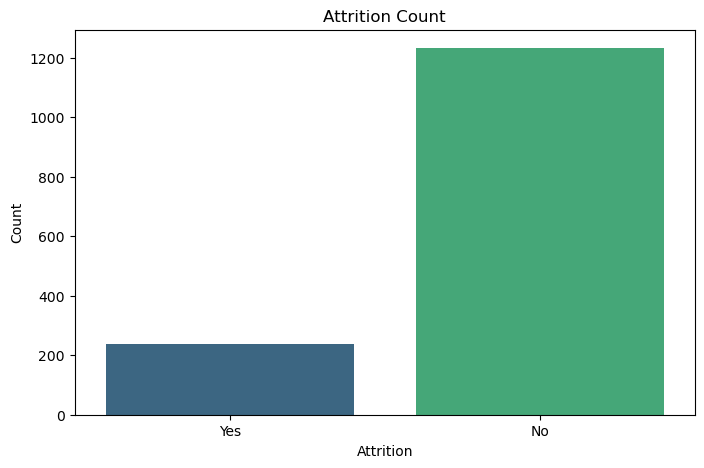

In [102]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

Large portion of employees are not 

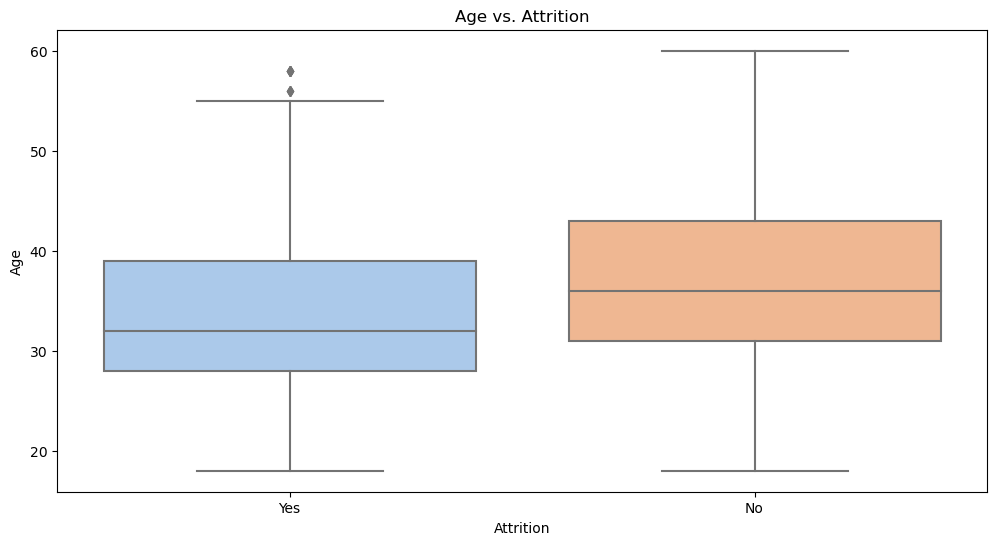

In [103]:
# Bivariate Analysis
# Boxplot for Age vs. Attrition
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', data=df, palette='pastel')
plt.title('Age vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

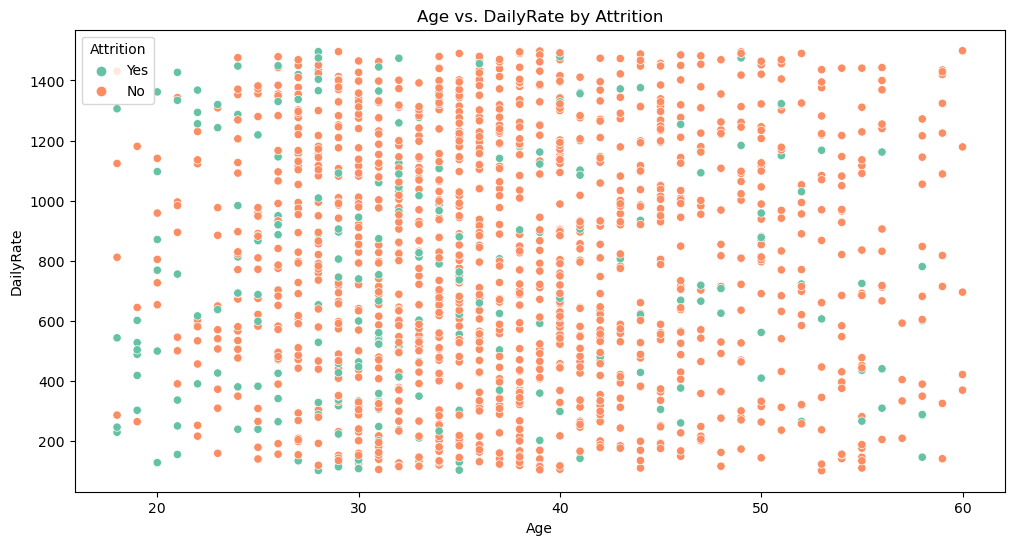

In [104]:
# Scatter plot for Age vs. DailyRate colored by Attrition
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='DailyRate', hue='Attrition', data=df, palette='Set2')
plt.title('Age vs. DailyRate by Attrition')
plt.xlabel('Age')
plt.ylabel('DailyRate')
plt.show()


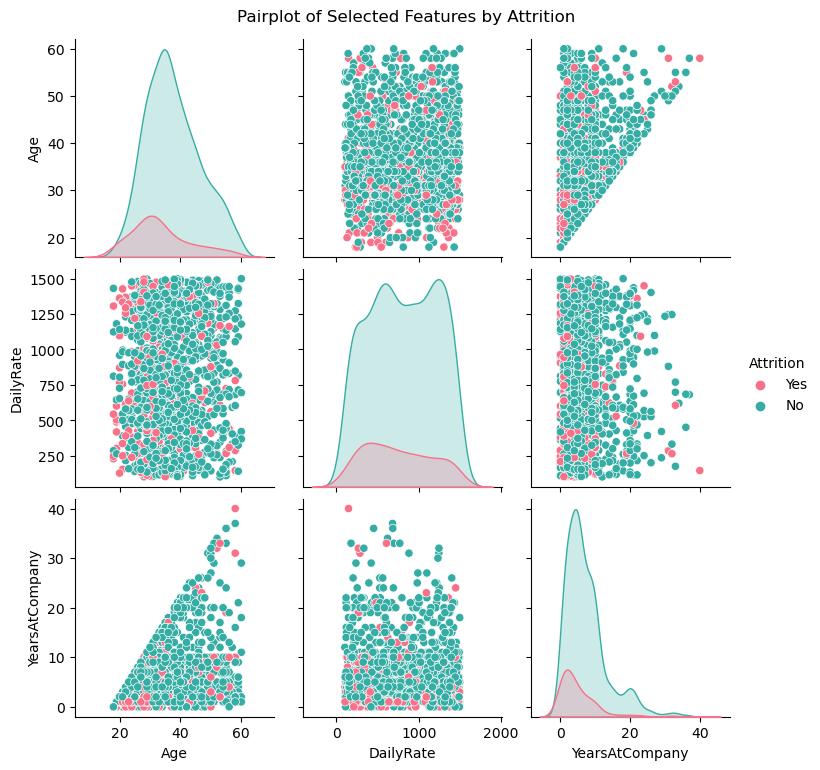

In [105]:
# Multivariate Analysis
# Pairplot for selected features
selected_features = ['Age', 'DailyRate', 'YearsAtCompany', 'Attrition']
df_selected = df[selected_features]
sns.pairplot(df_selected, hue='Attrition', palette='husl')
plt.suptitle('Pairplot of Selected Features by Attrition', y=1.02)
plt.show()

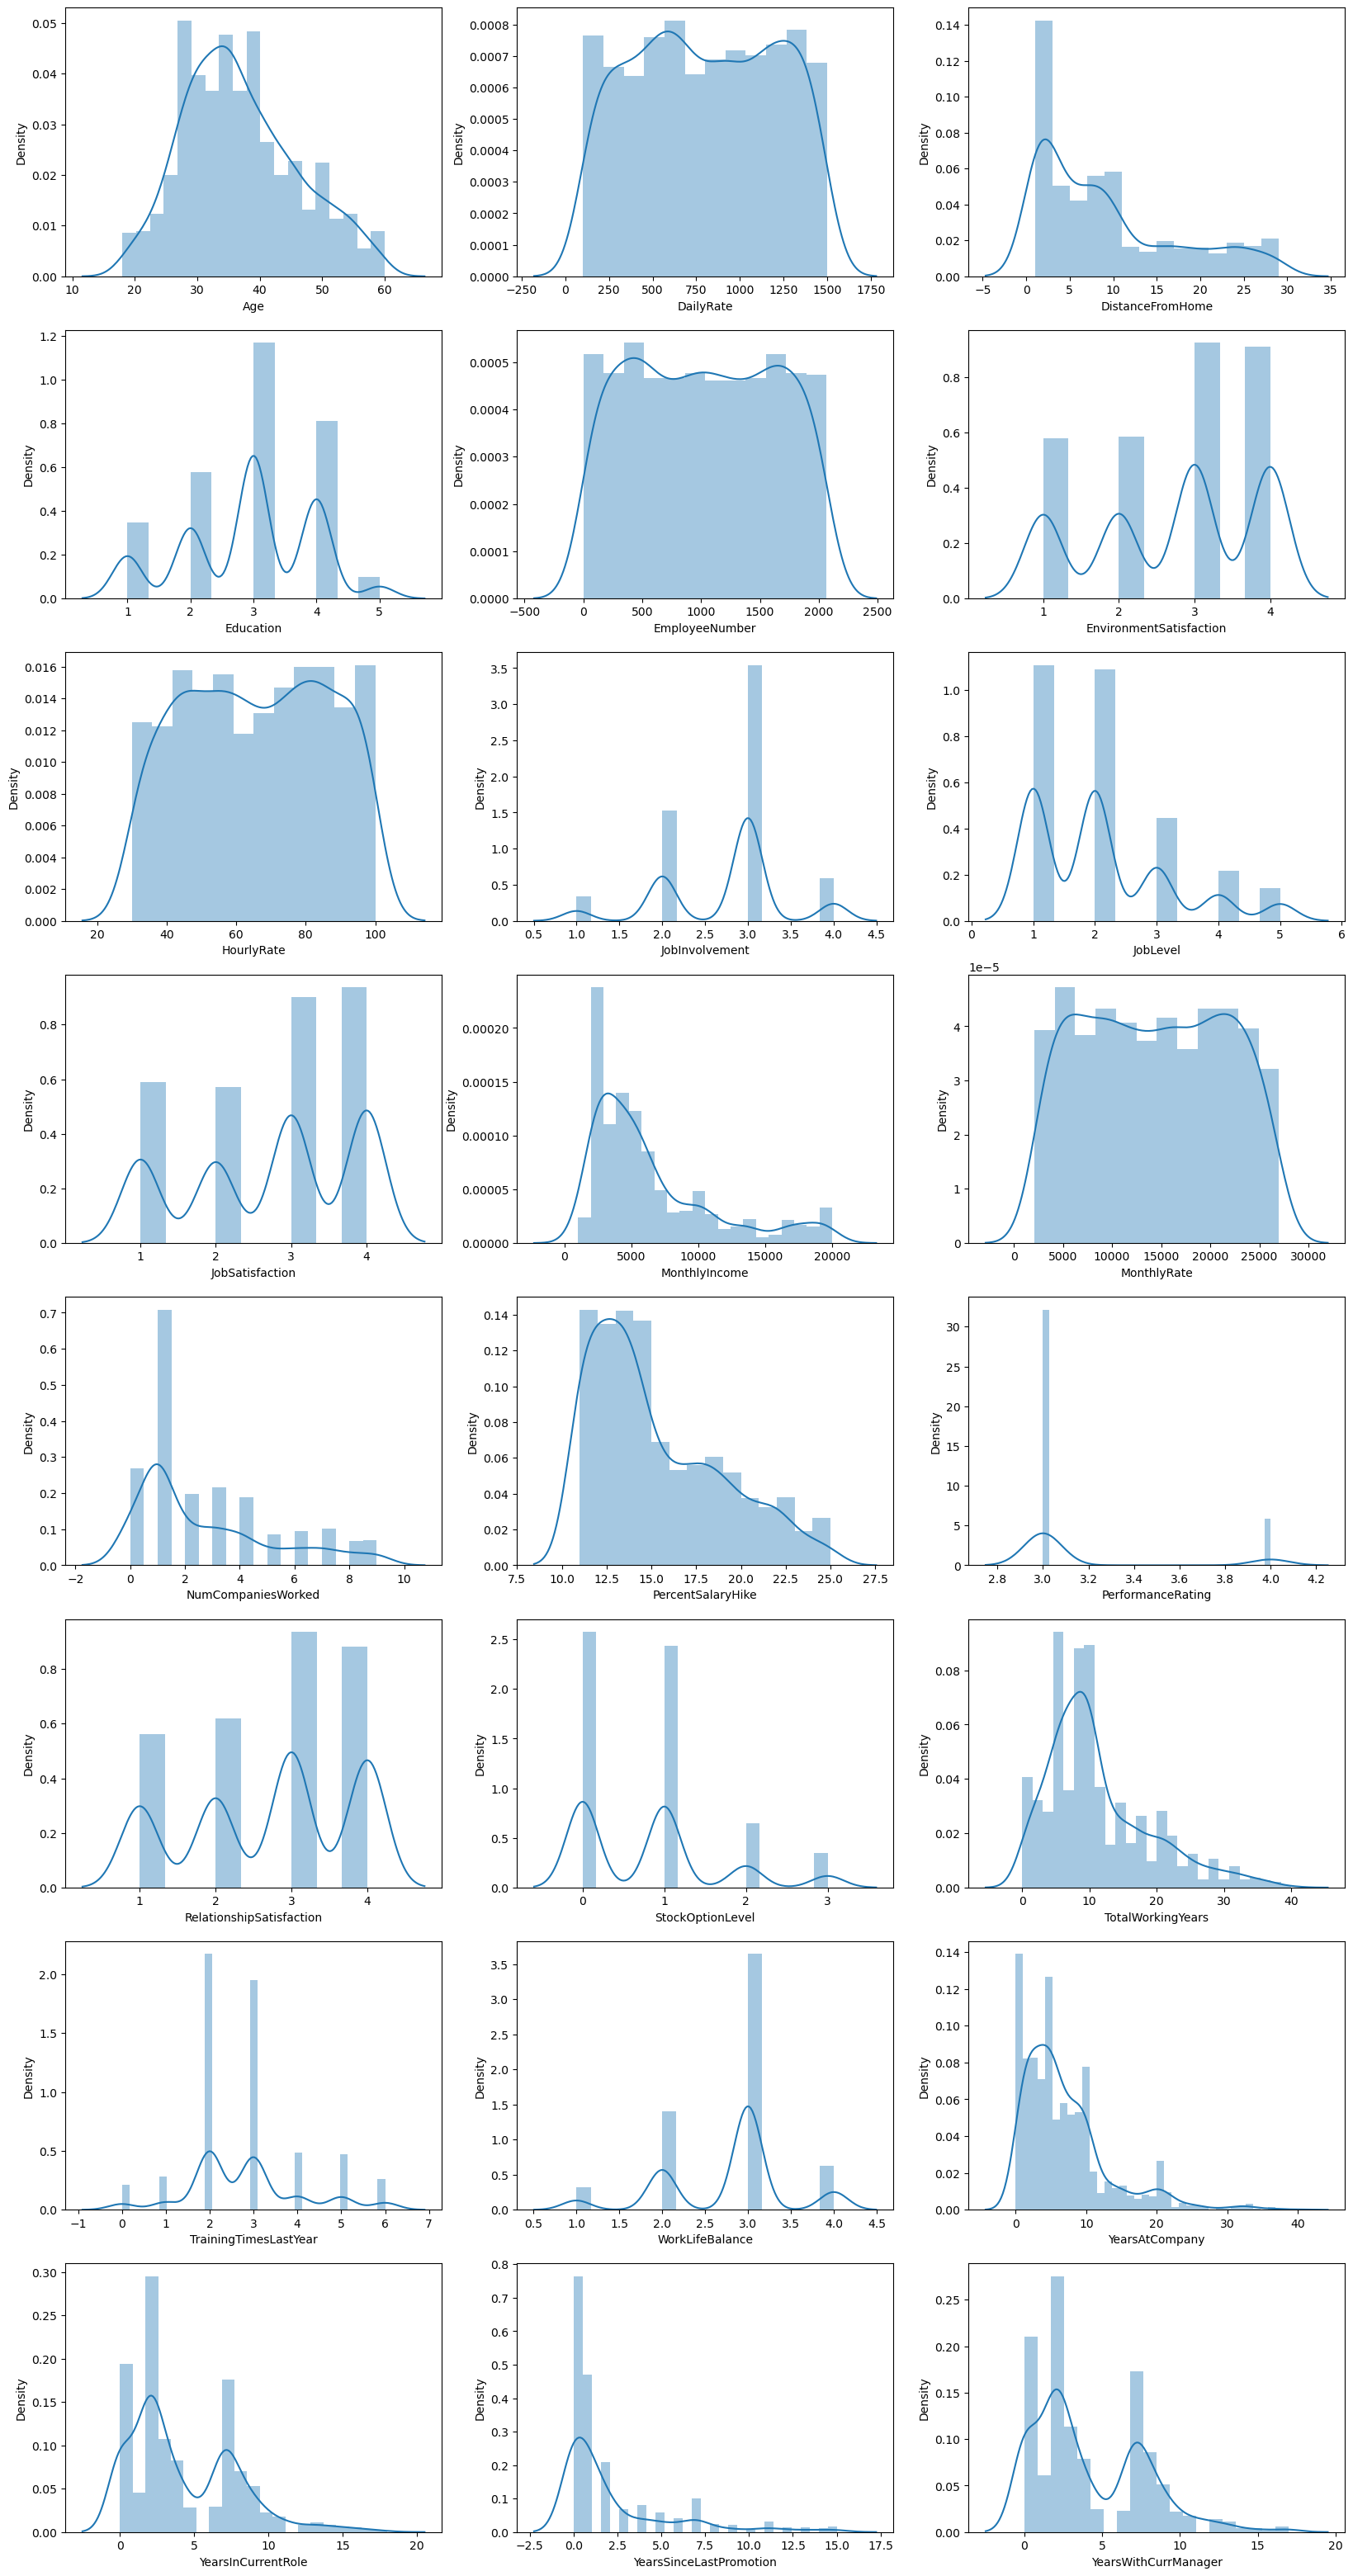

In [106]:
# checking how data is distributed for every column 
numerical_col = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20,60),facecolor='white')

plotnumber=1
for i in numerical_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [107]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


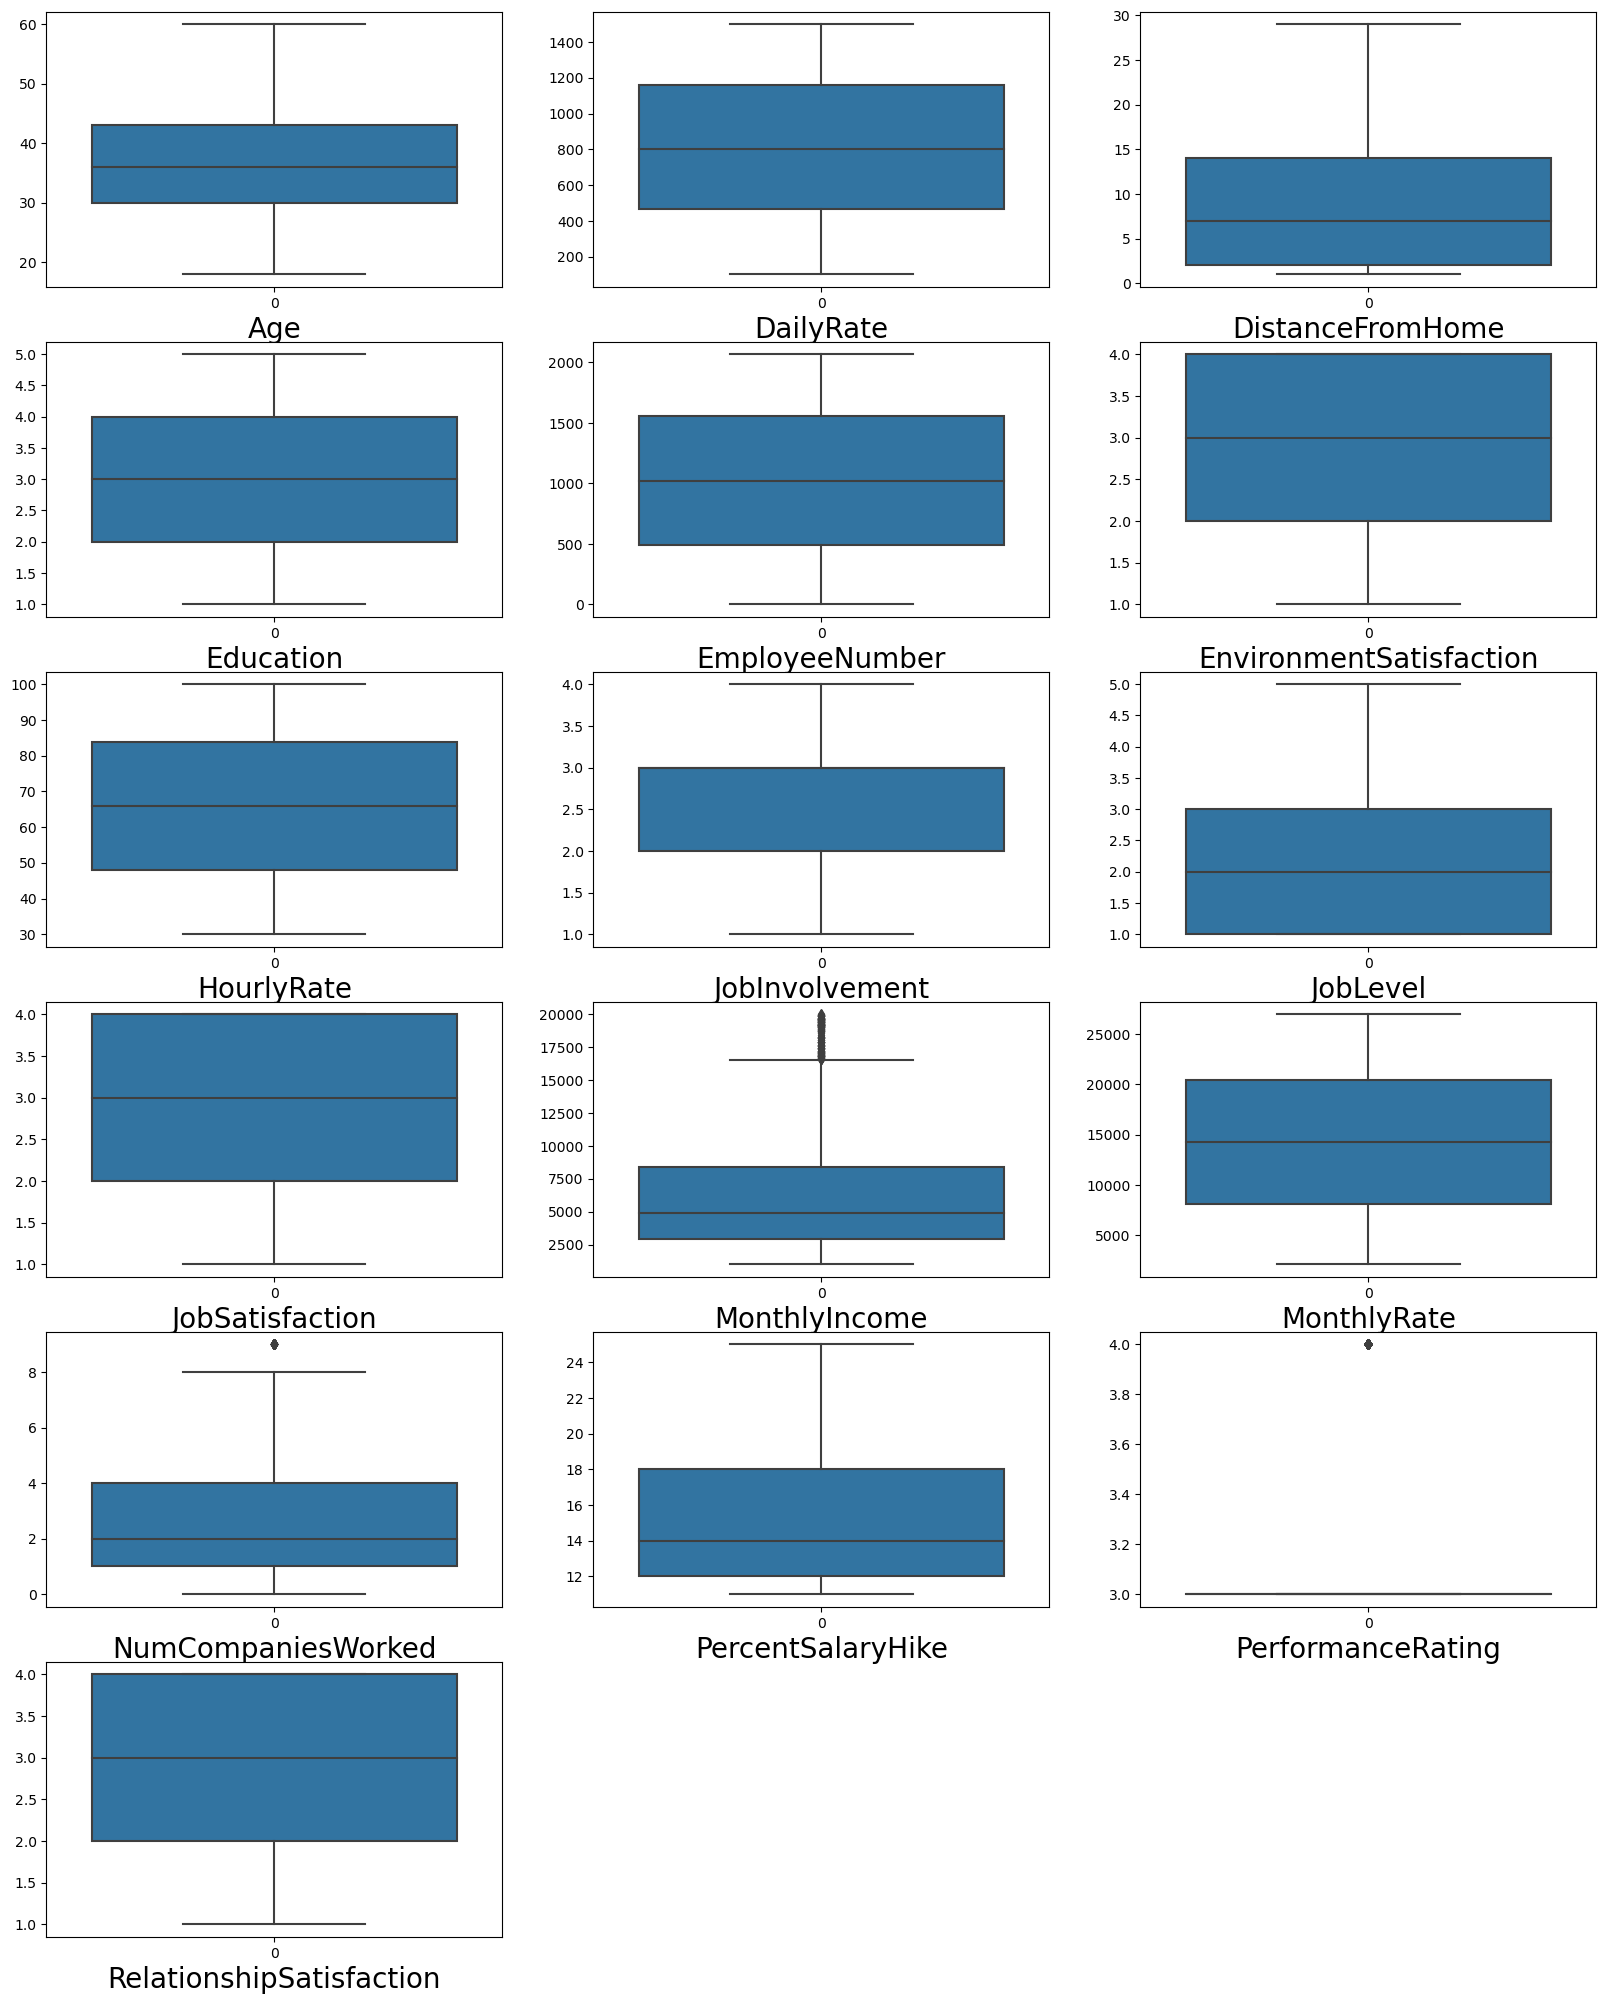

In [108]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in numerical_col:
    if graph<=16: 
        plt.subplot (6,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

We can see there are almost no outliers present and a little which we can see in MonthlyIncome ,NumCompaniesWorked and Performance Rating need not remove them as they are practically possible scenarios.
WE'll check for skewnss now.

In [109]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

We can see some skewness in some columns.(DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PerformanceRating),PercentSalaryHike,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager )

now we will try to remove it using cuberoot and many other transformation methods.

In [110]:
skewed_columns = ['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked',
                  'PerformanceRating','PercentSalaryHike','StockOptionLevel','TotalWorkingYears',
                  'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [111]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobSatisfaction            -0.329672
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked         -0.699002
PercentSalaryHike           0.601248
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -0.866884
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -0.820395
dtype: float64

We have removed skewness from many columns but still some skewness is present so we will use suare root method to remove it.

In [112]:
skewed_columns = ['JobLevel','MonthlyIncome','NumCompaniesWorked',
                  'PerformanceRating','PercentSalaryHike','YearsInCurrentRole','YearsWithCurrManager']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [113]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.295951
JobSatisfaction            -0.329672
MonthlyIncome               0.419614
MonthlyRate                 0.018578
NumCompaniesWorked         -1.909450
PercentSalaryHike           0.529881
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -1.657610
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -1.547889
dtype: float64

In [114]:
skewed_columns = ['NumCompaniesWorked',
                  'PerformanceRating','YearsInCurrentRole','YearsWithCurrManager']

for column in skewed_columns:
    df[column] = np.exp(df[column])

In [115]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.295951
JobSatisfaction            -0.329672
MonthlyIncome               0.419614
MonthlyRate                 0.018578
NumCompaniesWorked         -1.544431
PercentSalaryHike           0.529881
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -1.423155
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -1.333276
dtype: float64

In [116]:
skewed_columns = ['NumCompaniesWorked',
                  'PerformanceRating','YearsInCurrentRole','YearsWithCurrManager']

for column in skewed_columns:
    df[column] = np.log1p(df[column])

In [117]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.295951
JobSatisfaction            -0.329672
MonthlyIncome               0.419614
MonthlyRate                 0.018578
NumCompaniesWorked         -1.816542
PercentSalaryHike           0.529881
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -1.601523
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -1.496291
dtype: float64

In [118]:
skewed_columns = ['NumCompaniesWorked',
                  'PerformanceRating','YearsInCurrentRole','YearsWithCurrManager']

for column in skewed_columns:
    df[column] = df[column] ** 2

In [119]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.295951
JobSatisfaction            -0.329672
MonthlyIncome               0.419614
MonthlyRate                 0.018578
NumCompaniesWorked         -1.587645
PercentSalaryHike           0.529881
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -1.456668
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -1.363518
dtype: float64

In [120]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
skewed_columns = ['NumCompaniesWorked',
                  'PerformanceRating','YearsInCurrentRole','YearsWithCurrManager']

for column in skewed_columns:
    df[column], _ = yeojohnson(df[column] + 1)


In [121]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.295951
JobSatisfaction            -0.329672
MonthlyIncome               0.419614
MonthlyRate                 0.018578
NumCompaniesWorked         -0.320336
PercentSalaryHike           0.529881
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -0.484256
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -0.511465
dtype: float64

We have removed skewness completely.Now we ll check for correlations

In [122]:
cor=df.corr()
cor

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.017521,0.208034,-0.010145,0.010146,0.024287,0.029820,0.495147,-0.004892,...,0.005245,0.053535,0.072386,0.670212,-0.019621,-0.021490,0.277599,0.184427,0.178217,0.170991
DailyRate,0.010661,1.000000,-0.003634,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002281,0.030571,...,0.030561,0.007846,0.039363,0.023035,0.002453,-0.037848,-0.011387,0.012902,-0.038943,0.005258
DistanceFromHome,-0.017521,-0.003634,1.000000,0.019881,0.035129,-0.010800,0.020697,0.026766,0.016592,-0.009743,...,0.000474,0.009052,0.025370,-0.001288,-0.022502,-0.024142,0.009052,0.017812,0.001563,0.004696
Education,0.208034,-0.016806,0.019881,1.000000,0.042070,-0.027128,0.016775,0.042438,0.114573,-0.011296,...,-0.040403,-0.009118,0.015091,0.170609,-0.025100,0.009819,0.061038,0.057205,0.030448,0.053148
EmployeeNumber,-0.010145,-0.050990,0.035129,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.011781,-0.046247,...,-0.458020,-0.069861,0.055034,-0.003171,0.023603,0.010309,0.008860,0.002653,0.009250,0.001599
EnvironmentSatisfaction,0.010146,0.018355,-0.010800,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.000464,-0.006784,...,-0.036645,0.007665,0.017266,-0.019455,-0.019359,0.027627,0.004573,0.013192,0.031155,-0.001896
HourlyRate,0.024287,0.023381,0.020697,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.032281,-0.071335,...,-0.012160,0.001330,0.044862,-0.008422,-0.008548,-0.004607,-0.030339,-0.027139,-0.047487,-0.023687
JobInvolvement,0.029820,0.046135,0.026766,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.014572,-0.021476,...,-0.020606,0.034297,0.027925,0.007736,-0.015338,-0.014617,0.007433,0.021929,-0.012002,0.055259
JobLevel,0.495147,0.002281,0.016592,0.114573,-0.011781,0.000464,-0.032281,-0.014572,1.000000,-0.000250,...,-0.022076,0.013365,0.054328,0.727515,-0.015495,0.043505,0.465271,0.350497,0.278113,0.337121
JobSatisfaction,-0.004892,0.030571,-0.009743,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.000250,1.000000,...,0.021953,-0.012454,0.007516,-0.025468,-0.005779,-0.019459,0.008655,0.000213,0.001843,-0.014614


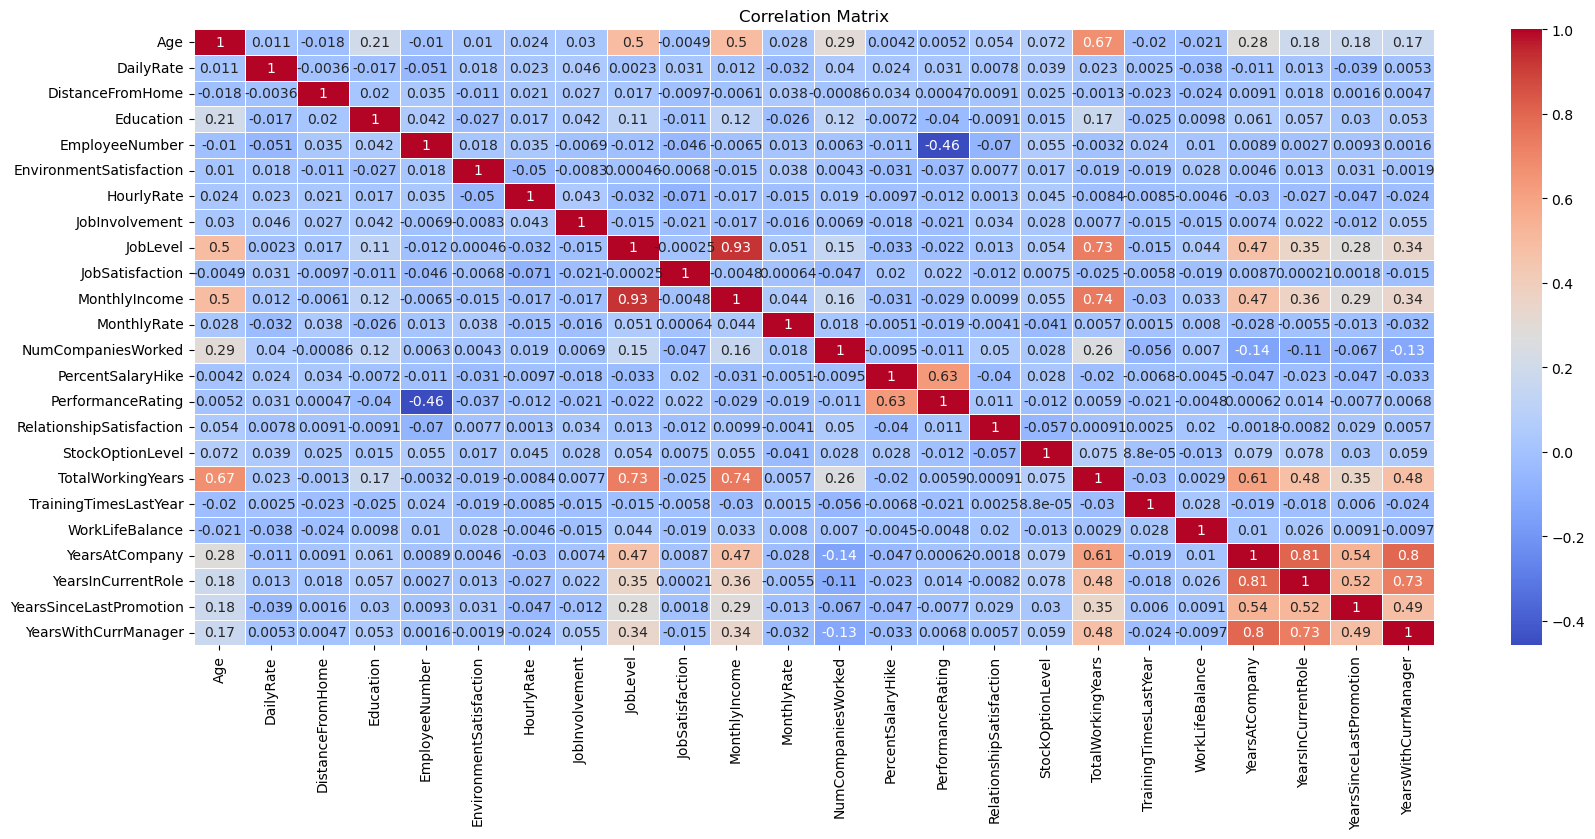

In [123]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [124]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder 
df1 = df.copy()

OE = OrdinalEncoder()

for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1, 1))

df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1.000000,2,1.0,1,2,...,0.044218,1,0.0,2.000000,0,1,1.817121,472.927747,0.000000,422.550285
1,49,0.0,1.0,279,1.0,2.000000,1,1.0,2,3,...,0.044218,4,1.0,2.154435,3,3,2.154435,594.466261,1.000000,483.923893
2,37,1.0,2.0,1373,1.0,1.259921,2,4.0,4,4,...,0.044218,2,0.0,1.912931,3,3,0.000000,29.193083,0.000000,25.904941
3,33,0.0,1.0,1392,1.0,1.442250,4,1.0,5,4,...,0.044218,3,0.0,2.000000,3,3,2.000000,594.466261,1.442250,25.904941
4,27,0.0,2.0,591,1.0,1.259921,1,3.0,7,1,...,0.044218,4,1.0,1.817121,3,3,1.259921,364.860550,1.259921,301.229468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,2.843867,2,3.0,2061,3,...,0.044218,3,1.0,2.571282,3,3,1.709976,364.860550,0.000000,348.010069
1466,39,0.0,2.0,613,1.0,1.817121,1,3.0,2062,4,...,0.044218,1,1.0,2.080084,5,3,1.912931,594.466261,1.000000,483.923893
1467,27,0.0,2.0,155,1.0,1.587401,3,1.0,2064,2,...,0.044218,2,1.0,1.817121,0,3,1.817121,364.860550,0.000000,348.010069
1468,49,0.0,1.0,1023,2.0,1.259921,3,3.0,2065,4,...,0.044218,4,0.0,2.571282,3,2,2.080084,557.171909,0.000000,511.589214


In [125]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [126]:
#splitting the data
x = df1.drop('Attrition',axis=1)
y = df1['Attrition']

In [127]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.412629,-0.891688,-0.937414,-1.701283,-0.660531,-1.224745,...,-6.245005e-17,-1.584178,-1.127326,-0.204222,-2.171982,-2.493820,0.127705,0.241094,-1.110010,0.479569
1,1.322365,-0.913194,-1.297775,-0.493817,0.159829,-1.868426,-0.937414,-1.699621,0.254625,0.816497,...,3.469447e-16,1.191438,0.678540,0.076388,0.155707,0.338096,0.703698,0.805039,0.198021,0.827940
2,0.008343,0.590048,1.414363,-0.493817,-1.003914,-0.891688,1.316673,-1.696298,1.169781,0.816497,...,-6.245005e-17,-0.658973,-1.127326,-0.362426,0.155707,0.338096,-2.975183,-1.817857,-1.110010,-1.771878
3,-0.429664,-0.913194,1.461466,-0.493817,-0.717210,1.061787,-0.937414,-1.694636,1.169781,-1.224745,...,-6.245005e-17,0.266233,-1.127326,-0.204222,0.155707,0.338096,0.439987,0.805039,0.776497,-1.771878
4,-1.086676,0.590048,-0.524295,-0.493817,-1.003914,-1.868426,0.565311,-1.691313,-1.575686,0.816497,...,-6.245005e-17,1.191438,0.678540,-0.536515,0.155707,0.338096,-0.823761,-0.260343,0.538006,-0.209075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.486775,-0.891688,0.565311,1.721670,0.254625,0.816497,...,-6.245005e-17,0.266233,0.678540,0.833802,0.155707,0.338096,-0.055254,-0.260343,-1.110010,0.056462
1466,0.227347,0.590048,-0.469754,-0.493817,-0.127741,-1.868426,0.565311,1.723332,1.169781,0.816497,...,-6.245005e-17,-1.584178,0.678540,-0.058709,1.707500,0.338096,0.291310,0.805039,0.198021,0.827940
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.488966,0.085049,-0.937414,1.726655,-0.660531,0.816497,...,3.469447e-16,-0.658973,0.678540,-0.536515,-2.171982,0.338096,0.127705,-0.260343,-1.110010,0.056462
1468,1.322365,-0.913194,0.546677,1.401512,-1.003914,0.085049,0.565311,1.728317,1.169781,0.816497,...,-6.245005e-17,1.191438,-1.127326,0.833802,0.155707,-1.077862,0.576737,0.631991,-1.110010,0.984974


In [128]:
# Checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

                    Variable       VIF
0                        Age  2.019154
1             BusinessTravel  1.020149
2                  DailyRate  1.024879
3                 Department  1.984524
4           DistanceFromHome  1.015385
5                  Education  1.064572
6             EducationField  1.018421
7             EmployeeNumber  1.023067
8    EnvironmentSatisfaction  1.022253
9                     Gender  1.021849
10                HourlyRate  1.022435
11            JobInvolvement  1.022840
12                  JobLevel  7.978885
13                   JobRole  1.914004
14           JobSatisfaction  1.021915
15             MaritalStatus  2.429444
16             MonthlyIncome  7.987972
17               MonthlyRate  1.018898
18        NumCompaniesWorked  1.303681
19                  OverTime  1.029795
20         PercentSalaryHike  1.016096
21         PerformanceRating  2.159648
22  RelationshipSatisfaction  1.027969
23          StockOptionLevel  2.406801
24         TotalWorkingYe

Clearly there is no multicollinerity exits. we will move ahead and check for best random state and accuracy.

In [130]:
# Checking for best random state and accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_RS = None
best_accuracy = 0.0

for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_RS = i

print(f'Best Random State: {best_RS}')
print(f'Best Accuracy: {best_accuracy:.2f}')


Best Random State: 23
Best Accuracy: 0.83


In [131]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_RS)

Now, We will train, evaluate and cross-validate the models. The results, including accuracy, classification report, confusion matrix, and cross-validation scores, will be printed for each model.

In [132]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

In [134]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    print("\n" + "="*40 + "\n")


Results for LogisticRegression:
Accuracy:  0.8662131519274376
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       363
         1.0       0.81      0.32      0.46        78

    accuracy                           0.87       441
   macro avg       0.84      0.65      0.69       441
weighted avg       0.86      0.87      0.84       441

Confusion Matrix:
 [[357   6]
 [ 53  25]]
Cross-validation scores: [0.8707483  0.88095238 0.86054422 0.86054422 0.89455782]
Mean Cross-validation score: 0.8734693877551021
Difference between Accuracy and cross-validation score is -0.7256235827664437


Results for RandomForestClassifier:
Accuracy:  0.8412698412698413
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       363
         1.0       0.90      0.12      0.20        78

    accuracy                           0.84       441
   macro avg       0.87    

Logistic Regression is the best model because

Accuracy and Precision: The Logistic Regression model has a higher accuracy (86.62%) compared to other models, indicating that it correctly predicts both classes (Attrition=0 and Attrition=1) more effectively.

Cross-validation Mean Score: The cross-validation mean score of 87.35% is consistent with the accuracy, indicating that the model is performing well across different subsets of the data.

Stability: The difference between the accuracy and cross-validation score is relatively small (-0.73%), suggesting that the model is stable and not overfitting.

In [135]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],              
    'solver': ['liblinear', 'saga']       
}

# Initializing GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')

In [136]:
# Fittng the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [137]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [139]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Displaying classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       363
         1.0       0.82      0.29      0.43        78

    accuracy                           0.86       441
   macro avg       0.84      0.64      0.68       441
weighted avg       0.86      0.86      0.84       441



In [140]:
#Saving the model using .pkl
import joblib
joblib.dump(best_model, "HR_Analytics_Project.pkl")

['HR_Analytics_Project.pkl']

In [141]:
# loading the saved model and getting the predictions
model=joblib.load("HR_Analytics_Project.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [142]:
a = np.array(y_test)
df3 = pd.DataFrame()
df3["Predicted"] = prediction
df3["Original"] = a
df3

,Predicted,Original
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
436,1.0,1.0
437,0.0,0.0
438,0.0,0.0
439,0.0,0.0
